In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/heartdisease.csv', index_col=0)
df

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [25]:
y = df['target']
y

age
63    1
37    1
41    1
56    1
57    1
     ..
57    0
45    0
68    0
57    0
57    0
Name: target, Length: 303, dtype: int64

In [26]:
x = df.drop('target', axis = 1)
x

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2
41,0,1,130,204,0,0,172,0,1.4,2,0,2
56,1,1,120,236,0,1,178,0,0.8,2,0,2
57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3
45,1,3,110,264,0,1,132,0,1.2,1,0,3
68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [27]:
# train & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((227, 12), (76, 12), (227,), (76,))

In [28]:
# SVM
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train) #훈련을 시킴

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm)) #원래 정답과 예측한 정답의 정확도
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.6973684210526315
[[16 17]
 [ 6 37]]


In [29]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8421052631578947
[[24  9]
 [ 3 40]]


In [30]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8157894736842105
[[26  7]
 [ 7 36]]


In [31]:
# RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))



--- Random Forest ---
0.8552631578947368
[[26  7]
 [ 4 39]]


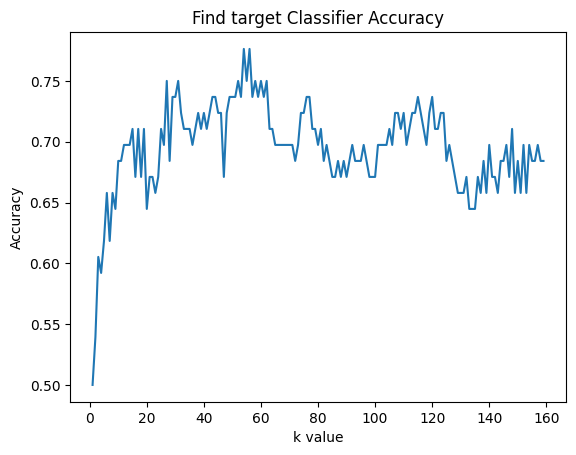

In [23]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 160)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))

plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find target Classifier Accuracy")
plt.show()